*best viewed in [nbviewer](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/BH_time_collocations/blob/master/results/notebooks/demonstrative_tenses.ipynb)*

# Tense Collocations with Demonstratives
## Investigating the Effects of Distance
### Cody Kingham
<a href="../../docs/sponsors.md"><img height=200px width=200px align='left' src="../../docs/images/CambridgeU_BW.png"></a>

In [1]:
! echo "last updated:"; date

last updated:
Thu 27 Feb 2020 11:34:30 GMT


## Introduction

Demonstrative adjectives such as הוא "that (m)", היא "that (f)", זה "this", זאת "these", occur frequently within time adverbials headed by a nominal element. These demonstratives also correspond with a contiuum of "near" versus "far" within a conceptual space. An event which is marked with הוא "that", for instance, is an event in the distant past or future relative to speech time, while an event marked with זה "this" is one which is near to the present of speech time. In this notebook, we will investigate how these opposite poles affect verb collocation tendencies.  

The investigation must also involve an examination of the prepositional lexemes that potentially direct these adverbials. For instance, the phrase עד היום הזה "unto this day" represents an event as extended over a time ending at the present. This kind of phrase should be classified differently from the similar phrase היום הזה "this day", which contains no extent and conveys only a single position near the present. The same issues could be said for phrases such as ביום הוא "in that day", a point in time in the future, versus עד היום ההוא "unto that day", an extended time ending in the future. 

Because demonstratives will be used with nominalized elements that have no inherent temporal anchor, we can assume that the lexeme of the time-word will matter less for the analysis. The position of the time-word in the conceptual space is fully reliant on the demonstrative element. 

### Relation to prototypical adverb collocations

In the notebook on [yiqtol associations with adverbs](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/BH_time_collocations/blob/master/results/notebooks/yqtl_association_with_advb.ipynb) we found that prototypical adverbs such as עולם "forever", נצח "duration", מחר "tomorrow", מתי "when", עוד "still", have a strong preference for collocating with the yiqtol. One possibility to explain this pattern is that these adverbials generally indicate open ended times in the future. The interrogative מתי is indeed different from the other cases, but it does share a common attribute of being unbounded (perhaps most explicitly so!). מחר is likewise different. Though it shares the property of being future oriented, does it also share the characteristic of unboundedness? 

Since this notebook focuses on nominal time adverbials, we will not see many of these prototypical adverbs. This also provides an opportunity to compare the collocation profiles of these phrases against the yiqtol preference for unbounded futuristic time adverbials. Do we see a similar phenomenon in the demonstratives?

<hr>

# Python

Now we import the modules and data needed for the analysis.

In [2]:
# standard & data science packages
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.serif'] = ['SBL Biblit']
import seaborn as sns
from bidi.algorithm import get_display # bi-directional text support for plotting
from paths import main_table, figs

# custom packages (see /tools)
from tf_tools.load import load_tf
from stats.significance import contingency_table, apply_fishers

# launch Text-Fabric with custom data
TF, API, A = load_tf(silent='deep')
A.displaySetup(condenseType='phrase')
F, E, T, L = A.api.F, A.api.E, A.api.T, A.api.L # corpus analysis methods

# load and set up project dataset
times_full = pd.read_csv(main_table, sep='\t')
times_full.set_index(['node'], inplace=True)
times = pd.DataFrame(times_full[~times_full.classi.str.contains('component')]) # select singles

## Data Exploration

Below we look at how often the demonstratives in question appear:

In [3]:
times.demon_dist.count()

475

This ^ is the number of non-null values contained in the dataset. Below we calculate the proportional representation out of all time adverbials.

In [4]:
times.demon_dist.count() / times.shape[0]

0.12509876218066895

These represent $13\%$ of the whole dataset. That is a non-trivial proportion. This already shows that the demonstrative construction plays a key role in Biblical Hebrew time adverbial phrases.

Here is how the values break down:

In [5]:
times.demon_dist.value_counts()

far     324
near    151
Name: demon_dist, dtype: int64

## Collocation Dataset

Now we will build a collocation dataset between the demonstrative categories, preposition lexemes, and verb tenses. First we create a composite column by adding the leading preposition string to the demonstrative.

In [6]:
times['prep_demon'] = times.leading_prep.fillna('ø') + '|' + times.demon_dist

We can have a look at the new column's discrete values below.

In [7]:
times['prep_demon'].value_counts()

ב|far       311
עד|near      68
ø|near       31
ב|near       29
אחר|near     12
כ|near        8
עד|far        6
ø|far         3
מן|far        2
ל|near        2
מן|near       1
ל|far         1
אחר|far       1
Name: prep_demon, dtype: int64

Now we can construct a collocation pivot table with the verb tenses. We set aside the infinitives and imperatives. We also drop those cases with < 5 occurrences.

In [8]:
tense_collocations = pd.pivot_table(
    times, index='prep_demon', columns='tense', 
    aggfunc='size',
    fill_value=0,
).drop(['infc','impv'], 1)

tense_collocations = tense_collocations[tense_collocations.sum(1) >= 5]

tense_collocations

tense,ptcp,qtl,wqtl,wyqtl,yqtl
prep_demon,,,,,
ø|near,1,14,2,1,8
אחר|near,0,3,0,8,0
ב|far,9,74,33,107,75
ב|near,3,8,3,6,8
עד|far,0,6,0,0,0
עד|near,2,18,0,37,4


Let's look at the ratios.

In [9]:
tense_ratios = tense_collocations.divide(tense_collocations.sum(1), axis=0)

tense_ratios

tense,ptcp,qtl,wqtl,wyqtl,yqtl
prep_demon,,,,,
ø|near,0.038462,0.538462,0.076923,0.038462,0.307692
אחר|near,0.000000,0.272727,0.000000,0.727273,0.000000
ב|far,0.030201,0.248322,0.110738,0.359060,0.251678
ב|near,0.107143,0.285714,0.107143,0.214286,0.285714
עד|far,0.000000,1.000000,0.000000,0.000000,0.000000
עד|near,0.032787,0.295082,0.000000,0.606557,0.065574


And the associations.

In [10]:
tense_assocs, odds = apply_fishers(tense_collocations, 0, 1)

tense_assocs

,ptcp,qtl,wqtl,wyqtl,yqtl
ø|near,-0.000000,2.217446,0.000000,-4.041268,0.485302
אחר|near,0.000000,0.000000,-0.215031,1.653891,-0.877280
ב|far,-0.389571,-1.960313,1.806835,-0.286822,1.635244
ב|near,1.178049,0.000000,0.138346,-0.981997,0.320134
עד|far,0.000000,3.299935,0.000000,-1.049680,-0.460718
עד|near,0.000000,0.056009,-2.507844,4.273573,-3.106689


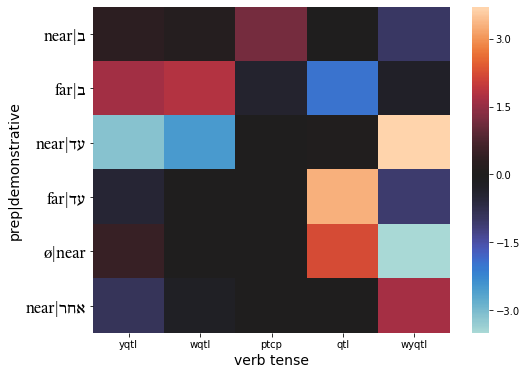

In [11]:
fig = plt.figure(figsize=(8, 6))
# reorder elements for analysis
plot_data = tense_assocs.loc[
    ['ב|near', 'ב|far', 'עד|near', 'עד|far', 'ø|near', 'אחר|near'],
    ['yqtl', 'wqtl', 'ptcp', 'qtl', 'wyqtl']
]
ax = sns.heatmap(plot_data, center=0, robust=True)
ax.set_yticklabels([get_display(t) for t in plot_data.index], size=16, rotation=0, fontfamily='serif')
ax.set_ylabel('prep|demonstrative', size=14)
ax.set_xlabel('verb tense', size=14)
plt.show()

We can see two important patterns in the graph. Those patterns can be summarized in the following table:

|adverbial|association|
|---------|-----------|
|  yqtl   |  ב\|far |
|  wqtl   |  ב\|far |
|  qtl    | עד\|far |
|  qtl    | ø\|near |
|  wyqtl  | עד\|near|
| wyqtl   | אחר\|near|
|  ptcp   | ב\|near |





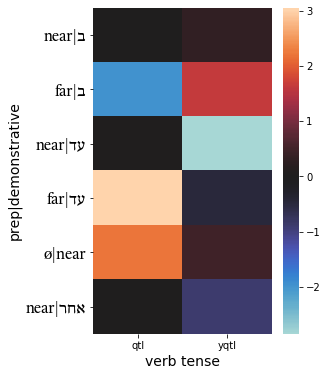

In [12]:
fig = plt.figure(figsize=(4, 6))
# reorder elements for analysis
plot_data = tense_assocs.loc[
    ['ב|near', 'ב|far', 'עד|near', 'עד|far', 'ø|near', 'אחר|near'],
    ['qtl', 'yqtl']
]
ax = sns.heatmap(plot_data, center=0, robust=True)
ax.set_yticklabels([get_display(t) for t in plot_data.index], size=16, rotation=0, fontfamily='serif')
ax.set_ylabel('prep|demonstrative', size=14)
ax.set_xlabel('verb tense', size=14)
plt.show()

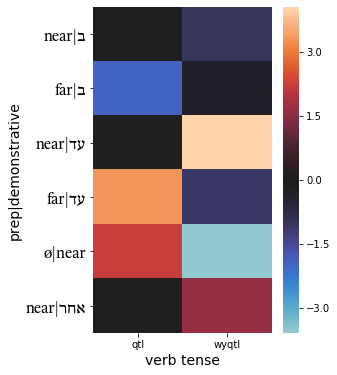

In [13]:
fig = plt.figure(figsize=(4, 6))
# reorder elements for analysis
plot_data = tense_assocs.loc[
    ['ב|near', 'ב|far', 'עד|near', 'עד|far', 'ø|near', 'אחר|near'],
    ['qtl', 'wyqtl']
]
ax = sns.heatmap(plot_data, center=0, robust=True)
ax.set_yticklabels([get_display(t) for t in plot_data.index], size=16, rotation=0, fontfamily='serif')
ax.set_ylabel('prep|demonstrative', size=14)
ax.set_xlabel('verb tense', size=14)
plt.show()

Based on these graphs above we can see a possible two-part opposition:

|  |near|far|
|--|----|---|
|**point (ב/ø)**| qtl | yqtl |
|**extent (עד)**| wyqtl | qtl |

We should be careful, though. While the עד|near adverbial is associated with wyqtl, it is not at all absent from qtl, with $18$ attested uses. Yet, given the overall frequency of qtl and the overall frequency of the עד|near adverbial, the use with wyqtl is significant. 

### Export Inspections

In [15]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_row', 100)

In [16]:
times[(times.prep_demon == 'עד|far') & (times.tense == 'qtl')][['ref', 'text', 'clause']].head(50)

,ref,text,clause
node,,,
1448274,Judg 18:1,עַד־הַיֹּ֥ום הַה֛וּא,כִּי֩ לֹֽא־נָ֨פְלָה לֹּ֜ו עַד־הַיֹּ֥ום הַה֛וּא בְּתֹוךְ־שִׁבְטֵ֥י יִשְׂרָאֵ֖ל בְּנַחֲלָֽה׃ ס
1448807,1 Kgs 3:2,עַ֖ד הַיָּמִ֥ים הָהֵֽם׃ פ,כִּ֠י לֹא־נִבְנָ֥ה בַ֨יִת֙ לְשֵׁ֣ם יְהוָ֔ה עַ֖ד הַיָּמִ֥ים הָהֵֽם׃ פ
1449121,2 Kgs 18:4,עַד־הַיָּמִ֤ים הָהֵ֨מָּה֙,כִּ֣י עַד־הַיָּמִ֤ים הָהֵ֨מָּה֙ הָי֤וּ בְנֵֽי־יִשְׂרָאֵל֙
1450773,Dan 12:1,עַ֖ד הָעֵ֣ת הַהִ֑יא,אֲשֶׁ֤ר לֹֽא־נִהְיְתָה֙ עַ֖ד הָעֵ֣ת הַהִ֑יא
1450860,Neh 6:1,גַּ֚ם עַד־הָעֵ֣ת הַהִ֔יא,גַּ֚ם עַד־הָעֵ֣ת הַהִ֔יא דְּלָתֹ֖ות לֹא־הֶעֱמַ֥דְתִּי בַשְּׁעָרִֽים׃
1450874,Neh 8:17,עַ֖ד הַיֹּ֣ום הַה֑וּא,כִּ֣י לֹֽא־עָשׂ֡וּ מִימֵי֩ יֵשׁ֨וּעַ בִּן־נ֥וּן כֵּן֙ בְּנֵ֣י יִשְׂרָאֵ֔ל עַ֖ד הַיֹּ֣ום הַה֑וּא


In [17]:
times[(times.prep_demon == 'ב|far') & (times.tense == 'wyqtl')][['ref','text', 'clause']].head(50)

,ref,text,clause
node,,,
1446925,Gen 19:35,גַּ֣ם בַּלַּ֧יְלָה הַה֛וּא,וַתַּשְׁקֶ֜יןָ גַּ֣ם בַּלַּ֧יְלָה הַה֛וּא אֶת־אֲבִיהֶ֖ן יָ֑יִן
1446934,Gen 21:22,בָּעֵ֣ת הַהִ֔וא,וַֽיְהִי֙ בָּעֵ֣ת הַהִ֔וא
1446960,Gen 26:12,בַּשָּׁנָ֥ה הַהִ֖וא,וַיִּמְצָ֛א בַּשָּׁנָ֥ה הַהִ֖וא מֵאָ֣ה שְׁעָרִ֑ים
1446965,Gen 26:24,בַּלַּ֣יְלָה הַה֔וּא,וַיֵּרָ֨א אֵלָ֤יו יְהוָה֙ בַּלַּ֣יְלָה הַה֔וּא
1446967,Gen 26:32,בַּיֹּ֣ום הַה֗וּא,וַיְהִ֣י׀ בַּיֹּ֣ום הַה֗וּא
1447004,Gen 30:35,בַּיֹּום֩ הַה֨וּא,וַיָּ֣סַר בַּיֹּום֩ הַה֨וּא אֶת־הַתְּיָשִׁ֜ים הָֽעֲקֻדִּ֣ים וְהַטְּלֻאִ֗ים וְאֵ֤ת כָּל־הָֽעִזִּי...
1447024,Gen 32:14,בַּלַּ֣יְלָה הַה֑וּא,וַיָּ֥לֶן שָׁ֖ם בַּלַּ֣יְלָה הַה֑וּא
1447033,Gen 33:16,בַּיֹּ֨ום הַה֥וּא,וַיָּשָׁב֩ בַּיֹּ֨ום הַה֥וּא עֵשָׂ֛ו לְדַרְכֹּ֖ו שֵׂעִֽירָה׃
1447046,Gen 38:1,בָּעֵ֣ת הַהִ֔וא,וַֽיְהִי֙ בָּעֵ֣ת הַהִ֔וא


In [18]:
wyqtl_ad_near = times[(times.prep_demon == 'עד|near') & (times.tense == 'wyqtl')][['ref', 'text', 'clause']]

wyqtl_ad_near

,ref,text,clause
node,,,
1447101,Gen 47:26,עַד־הַיֹּ֨ום הַזֶּ֜ה,וַיָּ֣שֶׂם אֹתָ֣הּ יֹוסֵ֡ף לְחֹק֩ עַד־הַיֹּ֨ום הַזֶּ֜ה עַל־אַדְמַ֥ת מִצְרַ֛יִם
1447762,Deut 2:22,עַ֖ד הַיֹּ֥ום הַזֶּֽה׃,וַיֵּשְׁב֣וּ תַחְתָּ֔ם עַ֖ד הַיֹּ֥ום הַזֶּֽה׃
1447836,Deut 11:4,עַ֖ד הַיֹּ֥ום הַזֶּֽה׃,וַיְאַבְּדֵ֣ם יְהוָ֔ה עַ֖ד הַיֹּ֥ום הַזֶּֽה׃
1447991,Josh 4:9,עַ֖ד הַיֹּ֥ום הַזֶּֽה׃,וַיִּ֣הְיוּ שָׁ֔ם עַ֖ד הַיֹּ֥ום הַזֶּֽה׃
1448003,Josh 5:9,עַ֖ד הַיֹּ֥ום הַזֶּֽה׃,וַיִּקְרָ֞א שֵׁ֣ם הַמָּקֹ֤ום הַהוּא֙ גִּלְגָּ֔ל עַ֖ד הַיֹּ֥ום הַזֶּֽה׃
1448024,Josh 6:25,עַ֖ד הַיֹּ֣ום הַזֶּ֑ה,וַתֵּ֨שֶׁב֙ בְּקֶ֣רֶב יִשְׂרָאֵ֔ל עַ֖ד הַיֹּ֣ום הַזֶּ֑ה
1448031,Josh 7:26,עַ֚ד הַיֹּ֣ום הַזֶּ֔ה,וַיָּקִ֨ימוּ עָלָ֜יו גַּל־אֲבָנִ֣ים גָּדֹ֗ול עַ֚ד הַיֹּ֣ום הַזֶּ֔ה
1448042,Josh 8:28,עַ֖ד הַיֹּ֥ום הַזֶּֽה׃,וַיְשִׂימֶ֤הָ תֵּל־עֹולָם֙ שְׁמָמָ֔ה עַ֖ד הַיֹּ֥ום הַזֶּֽה׃
1448044,Josh 8:29,עַ֖ד הַיֹּ֥ום הַזֶּֽה׃ פ,וַיָּקִ֤ימוּ עָלָיו֙ גַּל־אֲבָנִ֣ים גָּדֹ֔ול עַ֖ד הַיֹּ֥ום הַזֶּֽה׃ פ


In [19]:
wyqtl_ad_near.to_csv('../tables/inspect/<d_near_wyqtl.tsv', sep='\t', encoding='utf-16')

In [20]:
qtl_ad_near = times[(times.prep_demon == 'עד|near') & (times.tense == 'qtl')][['ref', 'text', 'clause']]

qtl_ad_near

,ref,text,clause
node,,,
1447926,Deut 29:3,עַ֖ד הַיֹּ֥ום הַזֶּֽה׃,וְלֹֽא־נָתַן֩ יְהוָ֨ה לָכֶ֥ם לֵב֙ וְעֵינַ֥יִם וְאָזְנַ֣יִם עַ֖ד הַיֹּ֥ום הַזֶּֽה׃
1447962,Deut 34:6,עַ֖ד הַיֹּ֥ום הַזֶּֽה׃,וְלֹֽא־יָדַ֥ע אִישׁ֙ אֶת־קְבֻ֣רָתֹ֔ו עַ֖ד הַיֹּ֥ום הַזֶּֽה׃
1448032,Josh 7:26,עַ֖ד הַיֹּ֥ום הַזֶּֽה׃ פ,עַל־כֵּ֠ן קָרָ֞א שֵׁ֣ם הַמָּקֹ֤ום הַהוּא֙ עֵ֣מֶק עָכֹ֔ור עַ֖ד הַיֹּ֥ום הַזֶּֽה׃ פ
1448097,Josh 14:14,עַ֖ד הַיֹּ֣ום הַזֶּ֑ה,עַל־כֵּ֣ן הָיְתָֽה־חֶ֠בְרֹון לְכָלֵ֨ב בֶּן־יְפֻנֶּ֤ה הַקְּנִזִּי֙ לְֽנַחֲלָ֔ה עַ֖ד הַיֹּ֣ום הַזּ...
1448114,Josh 22:17,עַ֖ד הַיֹּ֣ום הַזֶּ֑ה,אֲשֶׁ֤ר לֹֽא־הִטַּהַ֨רְנוּ֙ מִמֶּ֔נּוּ עַ֖ד הַיֹּ֣ום הַזֶּ֑ה
1448126,Josh 23:8,עַ֖ד הַיֹּ֥ום הַזֶּֽה׃,כַּאֲשֶׁ֣ר עֲשִׂיתֶ֔ם עַ֖ד הַיֹּ֥ום הַזֶּֽה׃
1448127,Josh 23:9,עַ֖ד הַיֹּ֥ום הַזֶּֽה׃,לֹא־עָ֤מַד אִישׁ֙ בִּפְנֵיכֶ֔ם עַ֖ד הַיֹּ֥ום הַזֶּֽה׃
1448257,Judg 15:19,עַ֖ד הַיֹּ֥ום הַזֶּֽה׃,עַל־כֵּ֣ן׀ קָרָ֣א שְׁמָ֗הּ עֵ֤ין הַקֹּורֵא֙ עַ֖ד הַיֹּ֥ום הַזֶּֽה׃
1448275,Judg 18:12,עַ֚ד הַיֹּ֣ום הַזֶּ֔ה,עַל־כֵּ֡ן קָרְאוּ֩ לַמָּקֹ֨ום הַה֜וּא מַחֲנֵה־דָ֗ן עַ֚ד הַיֹּ֣ום הַזֶּ֔ה


In [21]:
qtl_ad_far = times[(times.prep_demon == 'עד|far') & (times.tense == 'qtl')][['ref', 'text', 'clause']]

qtl_ad_far

,ref,text,clause
node,,,
1448274,Judg 18:1,עַד־הַיֹּ֥ום הַה֛וּא,כִּי֩ לֹֽא־נָ֨פְלָה לֹּ֜ו עַד־הַיֹּ֥ום הַה֛וּא בְּתֹוךְ־שִׁבְטֵ֥י יִשְׂרָאֵ֖ל בְּנַחֲלָֽה׃ ס
1448807,1 Kgs 3:2,עַ֖ד הַיָּמִ֥ים הָהֵֽם׃ פ,כִּ֠י לֹא־נִבְנָ֥ה בַ֨יִת֙ לְשֵׁ֣ם יְהוָ֔ה עַ֖ד הַיָּמִ֥ים הָהֵֽם׃ פ
1449121,2 Kgs 18:4,עַד־הַיָּמִ֤ים הָהֵ֨מָּה֙,כִּ֣י עַד־הַיָּמִ֤ים הָהֵ֨מָּה֙ הָי֤וּ בְנֵֽי־יִשְׂרָאֵל֙
1450773,Dan 12:1,עַ֖ד הָעֵ֣ת הַהִ֑יא,אֲשֶׁ֤ר לֹֽא־נִהְיְתָה֙ עַ֖ד הָעֵ֣ת הַהִ֑יא
1450860,Neh 6:1,גַּ֚ם עַד־הָעֵ֣ת הַהִ֔יא,גַּ֚ם עַד־הָעֵ֣ת הַהִ֔יא דְּלָתֹ֖ות לֹא־הֶעֱמַ֥דְתִּי בַשְּׁעָרִֽים׃
1450874,Neh 8:17,עַ֖ד הַיֹּ֣ום הַה֑וּא,כִּ֣י לֹֽא־עָשׂ֡וּ מִימֵי֩ יֵשׁ֨וּעַ בִּן־נ֥וּן כֵּן֙ בְּנֵ֣י יִשְׂרָאֵ֔ל עַ֖ד הַיֹּ֣ום הַה֑וּא
